In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [13]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('LG.csv')


In [14]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [16]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [17]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [18]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 8:2
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [19]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [20]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.2290928012841733
Coefficients: [0.00031018]
R-squared: 0.21717957043067826


In [22]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [23]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [24]:
# Đánh giá độ chính xác trên tập kiểm tra
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"MAPE trên tập kiểm tra: {test_mape}")
print(f"RMSE trên tập kiểm tra: {test_rmse}")
print(f"MSLE trên tập kiểm tra: {test_msle}")
print(f"R² trên tập kiểm tra: {test_r2}")

MAPE trên tập kiểm tra: 0.5358617724411383
RMSE trên tập kiểm tra: 0.23418593244853506
MSLE trên tập kiểm tra: 0.02358840322273233
R² trên tập kiểm tra: -9.70153817610178


In [25]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [26]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[141559.71699827 141604.11984    141648.52268173 141692.92552347
 141737.3283652  141781.73120694 141826.13404867 141870.53689041
 141914.93973214 141959.34257388 142003.74541561 142048.14825735
 142092.55109908 142136.95394082 142181.35678255 142225.75962429
 142270.16246602 142314.56530776 142358.96814949 142403.37099123
 142447.77383296 142492.1766747  142536.57951643 142580.98235817
 142625.3851999  142669.78804164 142714.19088337 142758.59372511
 142802.99656684 142847.39940858]


In [27]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [28]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [29]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

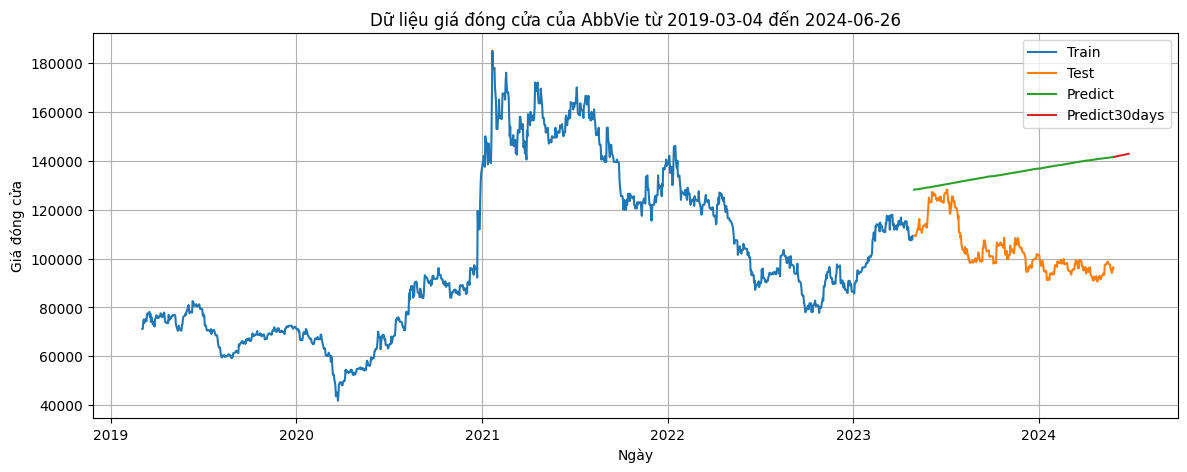

In [30]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [31]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [32]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[141559.71699827 141604.11984    141648.52268173 141692.92552347
 141737.3283652  141781.73120694 141826.13404867 141870.53689041
 141914.93973214 141959.34257388 142003.74541561 142048.14825735
 142092.55109908 142136.95394082 142181.35678255 142225.75962429
 142270.16246602 142314.56530776 142358.96814949 142403.37099123
 142447.77383296 142492.1766747  142536.57951643 142580.98235817
 142625.3851999  142669.78804164 142714.19088337 142758.59372511
 142802.99656684 142847.39940858 142891.80225031 142936.20509205
 142980.60793378 143025.01077552 143069.41361725 143113.81645899
 143158.21930072 143202.62214245 143247.02498419 143291.42782592
 143335.83066766 143380.23350939 143424.63635113 143469.03919286
 143513.4420346  143557.84487633 143602.24771807 143646.6505598
 143691.05340154 143735.45624327 143779.85908501 143824.26192674
 143868.66476848 143913.06761021 143957.47045195 144001.87329368
 144046.27613542 144090.67897715 144135.0818188

In [33]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

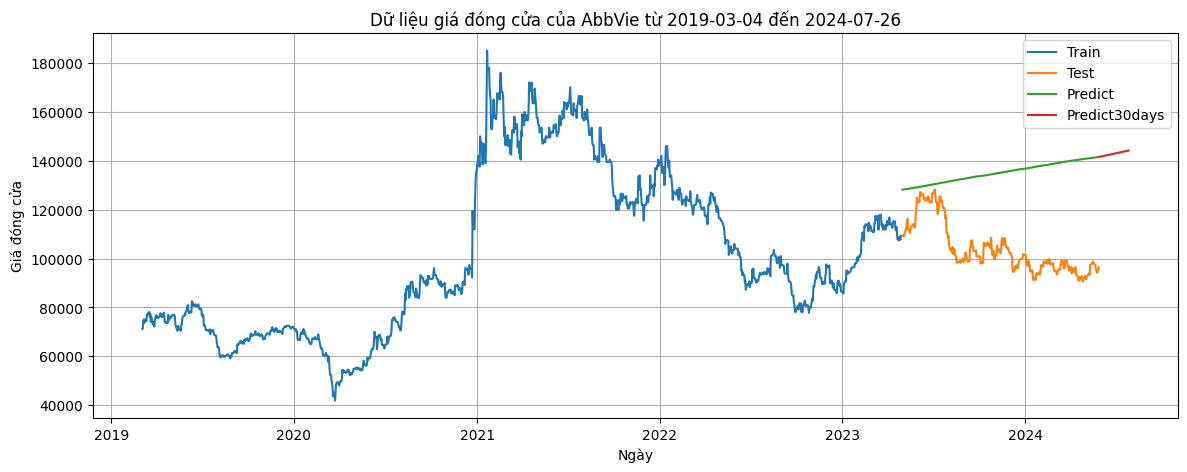

In [34]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [35]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [36]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

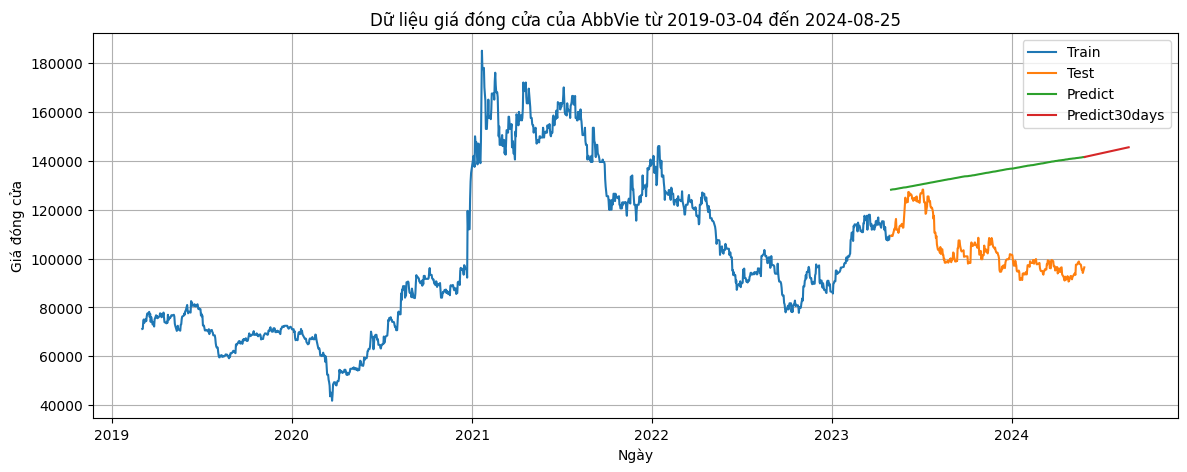

In [37]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()